<a href="https://colab.research.google.com/github/kongqiahaha/python-/blob/master/%E5%8D%B7%E7%A7%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E7%9A%84%E5%AE%9E%E7%8E%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
sys.path.insert(0,"./drive/My Drive/data/卷积神经网络的实现及应用")

In [0]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
np.random.seed(1)

In [0]:
def zero_pad(X,pad):
  X_pad = np.pad(X, ((0, 0),(pad, pad),(pad, pad),(0, 0)), 'constant', constant_values=0)
  return X_pad
  

x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[1,1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


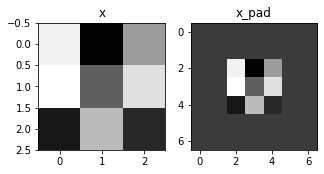

In [6]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])


fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [0]:
def conv_single_step(a_slice_prev, W, b):
  s=a_slice_prev*W+b
  z=np.sum(s)
  return z

In [8]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -23.16021220252078


In [0]:
def conv_forward(A_prev, W, b, hparameters):
  (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
  (f, f, n_C_prev, n_C)=W.shape
  stride=hparameters["stride"]
  pad = hparameters["pad"]
  n_H=int((n_H_prev-f+2*pad)/stride)+1
  n_W=int((n_W_prev-f+2*pad)/stride)+1
  Z = np.zeros((m, n_H, n_W, n_C))
  A_prev_pad = zero_pad(A_prev, pad)
  for i in range(m): 
    a_prev_pad = A_prev_pad[i] 
    for h in range(n_H):
      for w in range(n_W): 
        for c in range(n_C): 
          vert_start = h * stride
          vert_end = vert_start + f
          horiz_start = w * stride
          horiz_end = horiz_start + f
          a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
          Z[i, h, w, c] = np.sum(np.multiply(a_slice_prev, W[:, :, :, c]) + b[:, :, :, c])
  assert(Z.shape == (m, n_H, n_W, n_C))
  cache = (A_prev, W, b, hparameters)
  return Z, cache


In [10]:
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 1}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =", np.mean(Z))
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

Z's mean = 0.15585932488906465
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


In [0]:
def pool_forward(A_prev, hparameters, mode = "max"):
  (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
  f = hparameters["f"]
  stride = hparameters["stride"]
  n_H = int(1 + (n_H_prev - f) / stride)
  n_W = int(1 + (n_W_prev - f) / stride)
  n_C = n_C_prev
  A = np.zeros((m, n_H, n_W, n_C)) 
  for i in range(m):
    for h in range(n_H): 
      for w in range(n_W):
        for c in range (n_C):
          vert_start = h * stride
          vert_end = vert_start + f
          horiz_start = w * stride
          horiz_end = horiz_start + f

          a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
          if mode == "max":
            A[i, h, w, c] = np.max(a_prev_slice)
          elif mode == "average":
            A[i, h, w, c] = np.mean(a_prev_slice)
  
  cache = (A_prev, hparameters)
  assert(A.shape == (m, n_H, n_W, n_C))
  return A, cache

In [12]:
np.random.seed(1)
A_prev = np.random.randn(2, 4, 4, 3)
hparameters = {"stride" : 1, "f": 4}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A =", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A)

mode = max
A = [[[[1.74481176 1.6924546  2.10025514]]]


 [[[1.19891788 1.51981682 2.18557541]]]]

mode = average
A = [[[[-0.09498456  0.11180064 -0.14263511]]]


 [[[-0.09525108  0.28325018  0.33035185]]]]


In [0]:
def conv_backward(dZ, cache):
  (A_prev, W, b, hparameters) = cache
  (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
  (f, f, n_C_prev, n_C) = W.shape
  stride = hparameters['stride']
  pad = hparameters['pad']
  (m, n_H, n_W, n_C) = dZ.shape
  dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))
  dW = np.zeros((f, f, n_C_prev, n_C))
  db = np.zeros((1, 1, 1, n_C))
  A_prev_pad = zero_pad(A_prev, pad)
  dA_prev_pad = zero_pad(dA_prev, pad)
  for i in range(m):
    a_prev_pad = A_prev_pad[i]
    da_prev_pad = dA_prev_pad[i]
    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):
          vert_start = h * stride
          vert_end = vert_start + f
          horiz_start = w * stride
          horiz_end = horiz_start + f
          a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
          da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
          dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
          db[:,:,:,c] += dZ[i, h, w, c]
    dA_prev[i, :, :, :] = dA_prev_pad[i, pad:-pad, pad:-pad, :]
  assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
  return dA_prev, dW, db

In [15]:
np.random.seed(1)
dA, dW, db = conv_backward(Z, cache_conv)
print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))

dA_mean = 9.608990675868995
dW_mean = 10.581741275547563
db_mean = 76.37106919563735


In [0]:
def create_mask_from_window(x):
  mask = (x == np.max(x))
  return mask

In [17]:
np.random.seed(1)
x = np.random.randn(2,3)
mask = create_mask_from_window(x)
print('x = ', x)
print("mask = ", mask)

x =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
mask =  [[ True False False]
 [False False False]]


In [0]:
def distribute_value(dz, shape):
  (n_H, n_W) = shape
  average = dz / (n_H * n_W)
  a = np.ones(shape) * average
  return a

In [19]:
a = distribute_value(2, (2,2))
print('distributed value =', a)

distributed value = [[0.5 0.5]
 [0.5 0.5]]


In [0]:
def pool_backward(dA, cache, mode = "max"):
    """
    Implements the backward pass of the pooling layer
    
    Arguments:
    dA -- gradient of cost with respect to the output of the pooling layer, same shape as A
    cache -- cache output from the forward pass of the pooling layer, contains the layer's input and hparameters 
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    dA_prev -- gradient of cost with respect to the input of the pooling layer, same shape as A_prev
    """
    
    ### START CODE HERE ###
    
    # Retrieve information from cache (≈1 line)
    (A_prev, hparameters) = cache
    
    # Retrieve hyperparameters from "hparameters" (≈2 lines)
    stride = hparameters['stride']
    f = hparameters['f']
    
    # Retrieve dimensions from A_prev's shape and dA's shape (≈2 lines)
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    m, n_H, n_W, n_C = dA.shape
    
    # Initialize dA_prev with zeros (≈1 line)
    dA_prev = np.zeros_like(A_prev)
    
    for i in range(m):                       # loop over the training examples
        
        # select training example from A_prev (≈1 line)
        a_prev = A_prev[i]
        
        for h in range(n_H):                   # loop on the vertical axis
            for w in range(n_W):               # loop on the horizontal axis
                for c in range(n_C):           # loop over the channels (depth)
                    
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # Compute the backward propagation in both modes.
                    if mode == "max":
                        
                        # Use the corners and "c" to define the current slice from a_prev (≈1 line)
                        a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]
                        # Create the mask from a_prev_slice (≈1 line)
                        mask = create_mask_from_window(a_prev_slice)
                        # Set dA_prev to be dA_prev + (the mask multiplied by the correct entry of dA) (≈1 line)
                        dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += mask * dA[i, vert_start, horiz_start, c]
                        
                    elif mode == "average":
                        
                        # Get the value a from dA (≈1 line)
                        da = dA[i, vert_start, horiz_start, c]
                        # Define the shape of the filter as fxf (≈1 line)
                        shape = (f, f)
                        # Distribute it to get the correct slice of dA_prev. i.e. Add the distributed value of da. (≈1 line)
                        dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += distribute_value(da, shape)
                        
    ### END CODE ###
    
    # Making sure your output shape is correct
    assert(dA_prev.shape == A_prev.shape)
    return dA_prev
    

In [26]:
np.random.seed(1)
A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride" : 1, "f": 2}
A, cache = pool_forward(A_prev, hparameters)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = pool_backward(dA, cache, mode = "max")
print("mode = max")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1])  
print()
dA_prev = pool_backward(dA, cache, mode = "average")
print("mode = average")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1]) 

mode = max
mean of dA =  0.14571390272918056
dA_prev[1,1] =  [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]

mode = average
mean of dA =  0.14571390272918056
dA_prev[1,1] =  [[ 0.08485462  0.2787552 ]
 [ 1.26461098 -0.25749373]
 [ 1.17975636 -0.53624893]]
